In [29]:
### here I stole code from Chas and he stole from Dave to make nice sensitivity plots

In [2]:
import os, math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
import matplotlib

In [3]:
gap_list = [6e-6,6e-6,6e-6]
lam_list = np.logspace(-1.0,3.0,40)*1e-6
print(lam_list)

sens_vals = np.zeros((len(lam_list),len(gap_list)))

force_vals = np.zeros((len(lam_list),len(gap_list)))
force_vals_old = np.zeros((len(lam_list),len(gap_list)))


annotate = True
ref = False
institute = False #True

annotate_theory = True

plot_theory = True

plot_projections = True
all_three = False


fig=plt.figure(88, dpi=200)
## plot sensitivity compared to previous measurement

[1.00000000e-07 1.26638017e-07 1.60371874e-07 2.03091762e-07
 2.57191381e-07 3.25702066e-07 4.12462638e-07 5.22334507e-07
 6.61474064e-07 8.37677640e-07 1.06081836e-06 1.34339933e-06
 1.70125428e-06 2.15443469e-06 2.72833338e-06 3.45510729e-06
 4.37547938e-06 5.54102033e-06 7.01703829e-06 8.88623816e-06
 1.12533558e-05 1.42510267e-05 1.80472177e-05 2.28546386e-05
 2.89426612e-05 3.66524124e-05 4.64158883e-05 5.87801607e-05
 7.44380301e-05 9.42668455e-05 1.19377664e-04 1.51177507e-04
 1.91448198e-04 2.42446202e-04 3.07029063e-04 3.88815518e-04
 4.92388263e-04 6.23550734e-04 7.89652287e-04 1.00000000e-03]


<Figure size 1200x800 with 0 Axes>

In [4]:
## theory models




# moduli

cdat_m1l = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_mod1_low.txt",delimiter=",",skiprows=1)
cdat_m1h = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_mod1_high.txt",delimiter=",",skiprows=1)
hh_m1h = 30408*np.ones_like(cdat_m1l[:,0])##np.interp(cdat_m1l[:,0], cdat_m1h[:,0], cdat_m1h[:,1])
#plt.fill_between(cdat_m1l[:,0]*1e6, cdat_m1l[:,1], hh_m1h, color=[1,0.92,0.92])

cdat_m2l = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_mod2_low.txt",delimiter=",",skiprows=1)
cdat_m2h = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_mod2_high.txt",delimiter=",",skiprows=1)
hh_m2h = np.interp(cdat_m2l[:,0], cdat_m2h[:,0], cdat_m2h[:,1])
#plt.fill_between(cdat_m2l[:,0]*1e6, cdat_m2l[:,1], hh_m2h, color=[1,0.92,0.92])


# Gauge bosons

cdat_g1l = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_gauge_low.txt",delimiter=",",skiprows=1)
cdat_g1h = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_gauge_high.txt",delimiter=",",skiprows=1)
hh_g1h = np.interp(cdat_g1l[:,0], cdat_g1h[:,0], cdat_g1h[:,1])
#plt.fill_between(cdat_g1l[:,0]*1e6, cdat_g1l[:,1], hh_g1h, color=[0.85,1,0.85])

cdat_g2l = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_gauge2_low.txt",delimiter=",",skiprows=1)
cdat_g2h = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_gauge2_high.txt",delimiter=",",skiprows=1)
hh_g2h = np.interp(cdat_g2l[:,0], cdat_g2h[:,0], cdat_g2h[:,1])
#plt.fill_between(cdat_g2l[:,0]*1e6, cdat_g2l[:,1], hh_g2h, color=[0.75,1,0.75])


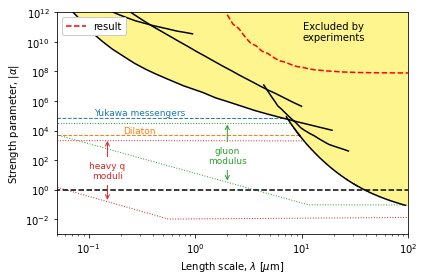

In [19]:
#prev meas

cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/master_ext_updated20.txt',delimiter=",",skiprows=1)
#plt.fill_between(cmeas[:,0]*1e6,cmeas[:,1],1e20,color=[135./256,205./256,250/256.])
plt.fill_between(cmeas[:,0]*1e6,cmeas[:,1],1e20,color=[255./256,246./256,143/256.], zorder=2)
plt.text(2e1, 5e10, 'Excluded by\nexperiments', \
         horizontalalignment='center', \
         verticalalignment='center', \
         multialignment='center')

cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/UWash20.txt',delimiter=",",skiprows=0)

plt.loglog(cmeas[:,0],cmeas[:,1],'k',linewidth=1.5)
if annotate:
    if ref:
        plt.text(2, 0.6e11, 'PRL 124, 101101 (2020)', rotation=-12.5, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
    if institute:
        plt.text(1, 0.8e11, 'Washington (2020)', rotation=-14.5, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)


cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/decca_prl_94_240401_2005.txt',delimiter=",",skiprows=1)
plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k',linewidth=1.5)
if annotate:
    if ref:
        plt.text(2, 0.6e11, 'PRL 94, 240401 (2005)', rotation=-12.5, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
    if institute:
        plt.text(1, 0.8e11, 'IUPUI (2005)', rotation=-14.5, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)

cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/sushkov_prl_107_171101_2011.txt',delimiter=",",skiprows=1)
plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k-',linewidth=1.5)
if annotate:
    if ref:
        plt.text(3.5, 1e8, 'PRL 107, 171101 (2011)', rotation=-37, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
    if institute:
        plt.text(2.5, 2e8, 'Yale (2011)', rotation=-37, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)

cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/geraci_prd_78_022002_2008.txt',delimiter=",",skiprows=1)
plt.loglog(cmeas[:-3,0]*1e6,cmeas[:-3,1],'k',linewidth=1.5)
if annotate:
    if ref:
        plt.text(55, 0.25e3, 'PRD 78, 022002 (2008)', rotation=-27, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
    if institute:
        plt.text(45, 0.3e3, 'Stanford (2008)', rotation=-27, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)

#cmeas = np.loadtxt('theory_and_experiment_inputs/kapner_prl_98_021101_2007.txt',delimiter=",",skiprows=1)

"""cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/eot-wash_limits_2006.txt',delimiter=",",skiprows=1)
plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k',linewidth=1.5)
if annotate:
    if ref:
        plt.text(140, 2.5e-1, 'PRL 98, 021101 (2007)', rotation=-33, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
    if institute:
        plt.text(140, 2.0e-1, 'Washington (2007)', rotation=-34, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
"""

cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/decca_2014.txt',delimiter=",",skiprows=0)
plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k',linewidth=1.5)
if annotate:
    if ref:
        plt.text(1, 0.25e8, 'PRL 116, 221102 (2016)', rotation=-33, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)
    if institute:
        plt.text(0.9, 0.25e8, 'IUPUI (2016)', rotation=-31, \
                 horizontalalignment='center', \
                 verticalalignment='center', fontsize=9)

        
if plot_theory:

    cdat = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_yuk.txt",delimiter=",",skiprows=1)
    plt.loglog(cdat[:,0]*1e6,cdat[:,1],'--',linewidth=1, #color=[0.25,0.25,0.25], \
               color='C0', zorder=1)
    if annotate_theory:
        plt.text(0.3, 1.5e5, 'Yukawa messengers', fontsize=9,\
                 horizontalalignment='center', \
                 verticalalignment='center', color='C0')

    cdat = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_dil.txt",delimiter=",",skiprows=1)
    plt.loglog(cdat[:,0]*1e6,cdat[:,1],'--',linewidth=1, #color=[0.25,0.25,0.25], \
               color='C1', zorder=1)
    if annotate_theory:
        plt.text(0.3, 1e4, 'Dilaton', fontsize=9, \
                 horizontalalignment='center', \
                 verticalalignment='center', color='C1')




    plt.loglog(cdat_m1l[:,0]*1e6, cdat_m1l[:,1],':',linewidth=1,# color=[0.25,0.25,0.25], \
               zorder=1, color='C2')
    plt.loglog(cdat_m1l[:,0]*1e6, hh_m1h,':',linewidth=1,# color=[0.25,0.25,0.25], \
               zorder=1, color='C2')
    if annotate_theory:
        plt.annotate('', xy=(2, 3.5e4), xycoords='data', xytext=(2, 0.3e1), textcoords='data', \
                     arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='C2'))
        plt.text(2, 0.2e3, 'gluon\nmodulus', fontsize=9, color='C2', \
                 horizontalalignment='center', verticalalignment='center', \
                 multialignment='center', bbox=dict(fc='w', ec='w'))




    plt.loglog(np.append(cdat_m2l[:,0][::-1], cdat_m2l[:,0][0]*10.0)*1e6, \
               np.append(cdat_m2l[:,1][::-1], cdat_m2l[:,1][0]), \
               ':',linewidth=1, #color=[0.25,0.25,0.25], \
               zorder=1, color='C3')

    plt.loglog(cdat_m2l[:,0]*1e6, hh_m2h,':',linewidth=1, #color=[0.25,0.25,0.25], \
               zorder=1, color='C3')
    if annotate_theory:
        plt.annotate('', xy=(0.15, 2.7e3), xycoords='data', xytext=(0.15, 0.15), textcoords='data', \
                     arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='C3'))
        plt.text(0.15, 0.2e2, 'heavy q\nmoduli', fontsize=9, color='C3', \
                 horizontalalignment='center', verticalalignment='center', multialignment='center', \
                 bbox=dict(fc='w', ec='w'))


    ## These two are gauaged baryons, Ithink

    #plt.loglog(cdat_g1l[:,0]*1e6, cdat_g1l[:,1],':',linewidth=1, #color=[0.25,0.25,0.25], \
    #           zorder=1, color='C4')
    #plt.loglog(cdat_g1l[:,0]*1e6, hh_g1h,':',linewidth=1, #color=[0.25,0.25,0.25], \
    #           zorder=1, color='C4')


    #plt.loglog(cdat_g2l[:,0]*1e6, cdat_g2l[:,1],':',linewidth=1, #color=[0.25,0.25,0.25], \
    #           zorder=1, color='C5')
    #plt.loglog(cdat_g2l[:,0]*1e6, hh_g2h,':',linewidth=1, #color=[0.25,0.25,0.25], \
    #           zorder=1, color='C5')






#col_list = ['b', 'b', 'b--', 'r']
#xmin_list = [1.1, 0.55, 0.4, 0.2]
#xmax_list = [30, 80, 100, 100]
#cdat = np.loadtxt("chas_curve.txt",delimiter=",",skiprows=1)
#gpts = np.logical_and(cdat[:,0]>1.1e-6,cdat[:,0]<30e-6)
#plt.loglog(cdat[gpts,0]*1e6,cdat[gpts,1],'b',linewidth=2.5)
#for i in range(1,len(gap_list)):
#    gval = "%.1f" % (gap_list[i]*1e6)
#    lab = r"Resonant excitation, $d = " + gval +  "\mu m$" 
#    gpts = np.logical_and(lam_list*1e6 >= xmin_list[i],lam_list*1e6 <= xmax_list[i])
#    plt.loglog(lam_list[gpts]*1e6,sens_vals[gpts,i],col_list[i],linewidth=2.5,label=lab)
#    
#    #lab = r"Constant excitation, $d = " + gval +  "\mu m$"
#    #plt.loglog(lam_list*1e6,sens_vals_num[:,i],'b--',linewidth=2.5,label=lab)
#
#    out_vals = np.hstack((lam_list, sens_vals[:,i]))
#    #np.save("data/sens_data_%.1f.npy"%(gap_list[i]*1e6), out_vals)



## Projections
""""
if plot_projections:

    if all_three:
        proj_bad = np.loadtxt('projections/attractorv2_sep15um_noise1e-17NrtHz_int1e4s.txt', \
                              delimiter=',')
        plt.loglog(proj_bad[:,0]*1e6, proj_bad[:,1], '--', color='g', lw=3, #alpha=0.6, \
                   label=r'$10^{-17}$ $\rm{N/\sqrt{Hz}}$, $s=12.5$ $\mu\rm{m}$, $t=10^4$ $\rm{s}$', \
                   zorder=20)

    proj_mid = np.loadtxt('projections/attractorv2_sep10um_noise1e-18NrtHz_int1e5s.txt', \
                          delimiter=',')
    plt.loglog(proj_mid[:,0]*1e6, proj_mid[:,1], '--', color='r', lw=3, #alpha=0.6, \
               label=r'$10^{-18}$ $\rm{N/\sqrt{Hz}}$, $s=7.5$ $\mu\rm{m}$, $t=10^5$ $\rm{s}$', \
               zorder=20)


    proj_good = np.loadtxt('projections/attractorv2_sep5um_noise1e-19NrtHz_int1e6s.txt', \
                           delimiter=',')
    plt.loglog(proj_good[:,0]*1e6, proj_good[:,1], '--', color='b', lw=3, #alpha=0.6, \
               label=r'$10^{-19}$ $\rm{N/\sqrt{Hz}}$, $s=2.5$ $\mu\rm{m}$, $t=10^6$ $\rm{s}$', \
               zorder=20)

    plt.legend(loc=1, fontsize=12, framealpha=1).set_zorder(100)
"""

alphas_real = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/lambda_7.50e-06_sep_3.00e-04_stroke_500_k_2_harmonics_20190903.txt")
lambdas_real = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/alpha_7.50e-06_sep_3.00e-04_stroke_500_k_2_harmonics_20190903.txt")

alphas_real2 = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/lambda_2.50e-06_sep_5.00e-04_stroke_5.00e+02_k_2_harmonics_20190902.txt")
lambdas_real2 = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/alpha_2.50e-06_sep_5.00e-04_stroke_500_k_2_harmonics_20190902.txt")

data_from_nadav = np.loadtxt("/home/analysis_user/New_trap_code/Scripts/DM search/tmp.csv")




#cdat = np.loadtxt("theory_and_experiment_inputs/andy_init_sens.txt",delimiter=",",skiprows=1)
##plt.loglog(cdat[:,0]*1e6,cdat[:,1],'r',linewidth=2.5,label=lab)
#cdat = np.loadtxt("theory_and_experiment_inputs/andy_fut_sens.txt",delimiter=",",skiprows=1)
#plt.loglog(cdat[:,0]*1e6,cdat[:,1],'r--',linewidth=2.5,label=lab)
#cdat = np.loadtxt("theory_and_experiment_inputs/andy_matfut_sens.txt",delimiter=",",skiprows=1)
#plt.loglog(cdat[:,0]*1e6,cdat[:,1],'r:',linewidth=2.5,label=lab)
#plt.loglog(lambdas_real/1e-6,alphas_real/np.sqrt(1e5), color = "red", linestyle = "dashed",
#          label=r'$10^{-17}$ $\rm{N/\sqrt{Hz}}$, $s=7.5$ $\mu\rm{m}$, $t=10^5$ $\rm{s}$')

plt.loglog(data_from_nadav[0]/1e-6,np.multiply(data_from_nadav[1],1e8), color = "red", linestyle = "dashed",
           label=r'result')

#plt.loglog(lambdas_real2/1e-6,alphas_real2/np.sqrt(1e6), color = "blue", linestyle = "dashed",
#        label=r'$10^{-18}$ $\rm{N/\sqrt{Hz}}$, $s=2.5$ $\mu\rm{m}$, $t=10^6$ $\rm{s}$')

plt.xlim([0.05, 100])
plt.ylim([0.001,1e12])
plt.plot([0.01,1000],[1,1],'k--')
#plt.yticks(np.logspace(0,10,5))
plt.yticks(np.logspace(-2,12,8))
plt.xlabel('Length scale, $\lambda$ [$\mu$m]')
plt.ylabel(r'Strength parameter, $|\alpha|$')
plt.legend(loc=2,framealpha=1)
fig.set_size_inches(6,4.5)
#plt.gcf().subplots_adjust(bottom=0.14,left=0.16,right=0.95,top=0.95)

plt.tight_layout()

#plt.savefig('sens_plot_af_20200317_4.pdf',format='pdf')

plt.show()




In [21]:
def limit_plot(data,label):
    #prev meas

    cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/master_ext_updated20.txt',delimiter=",",skiprows=1)
    #plt.fill_between(cmeas[:,0]*1e6,cmeas[:,1],1e20,color=[135./256,205./256,250/256.])
    plt.fill_between(cmeas[:,0]*1e6,cmeas[:,1],1e20,color=[255./256,246./256,143/256.], zorder=2)
    plt.text(2e1, 5e10, 'Excluded by\nexperiments', \
             horizontalalignment='center', \
             verticalalignment='center', \
             multialignment='center')

    cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/UWash20.txt',delimiter=",",skiprows=0)

    plt.loglog(cmeas[:,0],cmeas[:,1],'k',linewidth=1.5)
    if annotate:
        if ref:
            plt.text(2, 0.6e11, 'PRL 124, 101101 (2020)', rotation=-12.5, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
        if institute:
            plt.text(1, 0.8e11, 'Washington (2020)', rotation=-14.5, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)


    cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/decca_prl_94_240401_2005.txt',delimiter=",",skiprows=1)
    plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k',linewidth=1.5)
    if annotate:
        if ref:
            plt.text(2, 0.6e11, 'PRL 94, 240401 (2005)', rotation=-12.5, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
        if institute:
            plt.text(1, 0.8e11, 'IUPUI (2005)', rotation=-14.5, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)

    cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/sushkov_prl_107_171101_2011.txt',delimiter=",",skiprows=1)
    plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k-',linewidth=1.5)
    if annotate:
        if ref:
            plt.text(3.5, 1e8, 'PRL 107, 171101 (2011)', rotation=-37, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
        if institute:
            plt.text(2.5, 2e8, 'Yale (2011)', rotation=-37, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)

    cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/geraci_prd_78_022002_2008.txt',delimiter=",",skiprows=1)
    plt.loglog(cmeas[:-3,0]*1e6,cmeas[:-3,1],'k',linewidth=1.5)
    if annotate:
        if ref:
            plt.text(55, 0.25e3, 'PRD 78, 022002 (2008)', rotation=-27, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
        if institute:
            plt.text(45, 0.3e3, 'Stanford (2008)', rotation=-27, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)

    #cmeas = np.loadtxt('theory_and_experiment_inputs/kapner_prl_98_021101_2007.txt',delimiter=",",skiprows=1)

    """cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/eot-wash_limits_2006.txt',delimiter=",",skiprows=1)
    plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k',linewidth=1.5)
    if annotate:
        if ref:
            plt.text(140, 2.5e-1, 'PRL 98, 021101 (2007)', rotation=-33, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
        if institute:
            plt.text(140, 2.0e-1, 'Washington (2007)', rotation=-34, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
    """

    cmeas = np.loadtxt('/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/decca_2014.txt',delimiter=",",skiprows=0)
    plt.loglog(cmeas[:,0]*1e6,cmeas[:,1],'k',linewidth=1.5)
    if annotate:
        if ref:
            plt.text(1, 0.25e8, 'PRL 116, 221102 (2016)', rotation=-33, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)
        if institute:
            plt.text(0.9, 0.25e8, 'IUPUI (2016)', rotation=-31, \
                     horizontalalignment='center', \
                     verticalalignment='center', fontsize=9)


    if plot_theory:

        cdat = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_yuk.txt",delimiter=",",skiprows=1)
        plt.loglog(cdat[:,0]*1e6,cdat[:,1],'--',linewidth=1, #color=[0.25,0.25,0.25], \
                   color='C0', zorder=1)
        if annotate_theory:
            plt.text(0.3, 1.5e5, 'Yukawa messengers', fontsize=9,\
                     horizontalalignment='center', \
                     verticalalignment='center', color='C0')

        cdat = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/theory_and_experiment_inputs/andy_dil.txt",delimiter=",",skiprows=1)
        plt.loglog(cdat[:,0]*1e6,cdat[:,1],'--',linewidth=1, #color=[0.25,0.25,0.25], \
                   color='C1', zorder=1)
        if annotate_theory:
            plt.text(0.3, 1e4, 'Dilaton', fontsize=9, \
                     horizontalalignment='center', \
                     verticalalignment='center', color='C1')




        plt.loglog(cdat_m1l[:,0]*1e6, cdat_m1l[:,1],':',linewidth=1,# color=[0.25,0.25,0.25], \
                   zorder=1, color='C2')
        plt.loglog(cdat_m1l[:,0]*1e6, hh_m1h,':',linewidth=1,# color=[0.25,0.25,0.25], \
                   zorder=1, color='C2')
        if annotate_theory:
            plt.annotate('', xy=(2, 3.5e4), xycoords='data', xytext=(2, 0.3e1), textcoords='data', \
                         arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='C2'))
            plt.text(2, 0.2e3, 'gluon\nmodulus', fontsize=9, color='C2', \
                     horizontalalignment='center', verticalalignment='center', \
                     multialignment='center', bbox=dict(fc='w', ec='w'))




        plt.loglog(np.append(cdat_m2l[:,0][::-1], cdat_m2l[:,0][0]*10.0)*1e6, \
                   np.append(cdat_m2l[:,1][::-1], cdat_m2l[:,1][0]), \
                   ':',linewidth=1, #color=[0.25,0.25,0.25], \
                   zorder=1, color='C3')

        plt.loglog(cdat_m2l[:,0]*1e6, hh_m2h,':',linewidth=1, #color=[0.25,0.25,0.25], \
                   zorder=1, color='C3')
        if annotate_theory:
            plt.annotate('', xy=(0.15, 2.7e3), xycoords='data', xytext=(0.15, 0.15), textcoords='data', \
                         arrowprops=dict(arrowstyle='<->', connectionstyle='arc3', color='C3'))
            plt.text(0.15, 0.2e2, 'heavy q\nmoduli', fontsize=9, color='C3', \
                     horizontalalignment='center', verticalalignment='center', multialignment='center', \
                     bbox=dict(fc='w', ec='w'))


        ## These two are gauaged baryons, Ithink

        #plt.loglog(cdat_g1l[:,0]*1e6, cdat_g1l[:,1],':',linewidth=1, #color=[0.25,0.25,0.25], \
        #           zorder=1, color='C4')
        #plt.loglog(cdat_g1l[:,0]*1e6, hh_g1h,':',linewidth=1, #color=[0.25,0.25,0.25], \
        #           zorder=1, color='C4')


        #plt.loglog(cdat_g2l[:,0]*1e6, cdat_g2l[:,1],':',linewidth=1, #color=[0.25,0.25,0.25], \
        #           zorder=1, color='C5')
        #plt.loglog(cdat_g2l[:,0]*1e6, hh_g2h,':',linewidth=1, #color=[0.25,0.25,0.25], \
        #           zorder=1, color='C5')






    #col_list = ['b', 'b', 'b--', 'r']
    #xmin_list = [1.1, 0.55, 0.4, 0.2]
    #xmax_list = [30, 80, 100, 100]
    #cdat = np.loadtxt("chas_curve.txt",delimiter=",",skiprows=1)
    #gpts = np.logical_and(cdat[:,0]>1.1e-6,cdat[:,0]<30e-6)
    #plt.loglog(cdat[gpts,0]*1e6,cdat[gpts,1],'b',linewidth=2.5)
    #for i in range(1,len(gap_list)):
    #    gval = "%.1f" % (gap_list[i]*1e6)
    #    lab = r"Resonant excitation, $d = " + gval +  "\mu m$" 
    #    gpts = np.logical_and(lam_list*1e6 >= xmin_list[i],lam_list*1e6 <= xmax_list[i])
    #    plt.loglog(lam_list[gpts]*1e6,sens_vals[gpts,i],col_list[i],linewidth=2.5,label=lab)
    #    
    #    #lab = r"Constant excitation, $d = " + gval +  "\mu m$"
    #    #plt.loglog(lam_list*1e6,sens_vals_num[:,i],'b--',linewidth=2.5,label=lab)
    #
    #    out_vals = np.hstack((lam_list, sens_vals[:,i]))
    #    #np.save("data/sens_data_%.1f.npy"%(gap_list[i]*1e6), out_vals)



    ## Projections
    """"
    if plot_projections:

        if all_three:
            proj_bad = np.loadtxt('projections/attractorv2_sep15um_noise1e-17NrtHz_int1e4s.txt', \
                                  delimiter=',')
            plt.loglog(proj_bad[:,0]*1e6, proj_bad[:,1], '--', color='g', lw=3, #alpha=0.6, \
                       label=r'$10^{-17}$ $\rm{N/\sqrt{Hz}}$, $s=12.5$ $\mu\rm{m}$, $t=10^4$ $\rm{s}$', \
                       zorder=20)

        proj_mid = np.loadtxt('projections/attractorv2_sep10um_noise1e-18NrtHz_int1e5s.txt', \
                              delimiter=',')
        plt.loglog(proj_mid[:,0]*1e6, proj_mid[:,1], '--', color='r', lw=3, #alpha=0.6, \
                   label=r'$10^{-18}$ $\rm{N/\sqrt{Hz}}$, $s=7.5$ $\mu\rm{m}$, $t=10^5$ $\rm{s}$', \
                   zorder=20)


        proj_good = np.loadtxt('projections/attractorv2_sep5um_noise1e-19NrtHz_int1e6s.txt', \
                               delimiter=',')
        plt.loglog(proj_good[:,0]*1e6, proj_good[:,1], '--', color='b', lw=3, #alpha=0.6, \
                   label=r'$10^{-19}$ $\rm{N/\sqrt{Hz}}$, $s=2.5$ $\mu\rm{m}$, $t=10^6$ $\rm{s}$', \
                   zorder=20)

        plt.legend(loc=1, fontsize=12, framealpha=1).set_zorder(100)
    """

    alphas_real = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/lambda_7.50e-06_sep_3.00e-04_stroke_500_k_2_harmonics_20190903.txt")
    lambdas_real = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/alpha_7.50e-06_sep_3.00e-04_stroke_500_k_2_harmonics_20190903.txt")

    alphas_real2 = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/lambda_2.50e-06_sep_5.00e-04_stroke_5.00e+02_k_2_harmonics_20190902.txt")
    lambdas_real2 = np.loadtxt("/home/analysis_user/New_trap_code/SensitivityFramework/results/calculation/alpha_2.50e-06_sep_5.00e-04_stroke_500_k_2_harmonics_20190902.txt")

    data_from_nadav = np.loadtxt("/home/analysis_user/New_trap_code/Scripts/DM search/tmp.csv")


    plt.loglog(data[0]/1e-6,np.multiply(data[1],1e8), color = "red", linestyle = "dashed",
               label=label)

    plt.xlim([0.05, 100])
    plt.ylim([0.001,1e12])
    plt.plot([0.01,1000],[1,1],'k--')
    #plt.yticks(np.logspace(0,10,5))
    plt.yticks(np.logspace(-2,12,8))
    plt.xlabel('Length scale, $\lambda$ [$\mu$m]')
    plt.ylabel(r'Strength parameter, $|\alpha|$')
    plt.legend(loc=2,framealpha=1)
    fig.set_size_inches(6,4.5)
    #plt.gcf().subplots_adjust(bottom=0.14,left=0.16,right=0.95,top=0.95)

    plt.tight_layout()

    #plt.savefig('sens_plot_af_20200317_4.pdf',format='pdf')

    plt.show()





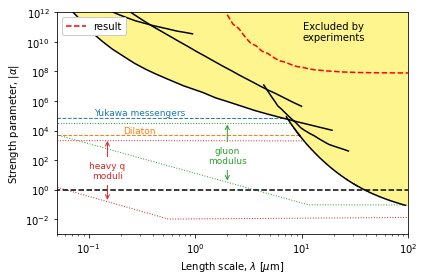

In [23]:
data = np.loadtxt("/home/analysis_user/New_trap_code/Scripts/DM search/tmp.csv")
limit_plot(data,"result")
